<a href="https://colab.research.google.com/github/hirofsgit/Python_CASI/blob/main/Chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 設定

In [1]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 28.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f7c87d6fab079d0e04bae84c89f81bf24e2112ddebfdb9ba4f5172268329763b
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import japanize_matplotlib 
import math
from scipy.stats import beta
from math import factorial, log
from scipy import special, optimize
%matplotlib inline
from scipy import integrate
from scipy.optimize import minimize
from scipy.special import binom
from scipy.integrate import quad

In [3]:
pd.options.display.float_format = '{:.2f}'.format

# 6.1

## 表6.1

In [ ]:
y_x=[7840,1317,239,42,14,4,4,1]

ロビンスの公式

$\displaystyle E[\theta | x] = (x+1)\frac{f(x+1)}{f(x)}$

$\displaystyle \hat{f}(x) = \frac{y_x}{N}$を用いて、ロビンスの公式の推定値版

$\displaystyle \hat{E}[\theta|x]=(x+1)\frac{\hat{f}(x+1)}{\hat{f}(x)}=(x+1)\frac{y_{x+1}}{y_x}$


In [ ]:
robbins = [(i+1)*y_x[i+1]/y_x[i] for i in range(len(y_x)-1)]
robbins.append(np.NaN)

ガンマ最尤推定

$\displaystyle f_{\nu,\sigma}(x)=\frac{\gamma^{\nu+x}\Gamma(\nu + x)}{\sigma^{\nu}\Gamma(\nu)x!}$ , $\gamma = \frac{\sigma}{1+\sigma} $

尤度関数
$\displaystyle L(\nu,\sigma)=\prod_{x=0}^{x_{max}}f_{\nu,\sigma}(x) ^{y_x}$

対数尤度関数$\displaystyle \sum_{x=0}^{x_{max}}y_x \log (f_{\nu,\sigma}(x)) $

$\hat{f}(x) = \hat{f}_{\nu,\sigma}(x) $ をロビンスの公式に使う

In [ ]:
def f(x,nu,sigma):
  gam = sigma/(1+sigma)
  a = gam**(nu+x)*special.gamma(nu+x)
  b = sigma**nu*special.gamma(nu)*factorial(x)
  return a/b

In [ ]:
def likelihood(params):
  nu = params[0]
  sigma = params[1]
  return -sum([y_x[x]*np.log(f(x,nu,sigma)) for x in range(len(y_x))])

In [ ]:
results = optimize.minimize(likelihood ,x0=[0.01,1.00],bounds=[[0, np.inf], [0, np.inf]])
results

      fun: 5348.039959560624
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494697e-05, -4.54747351e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 18
     njev: 21
   status: 0
  success: True
        x: array([0.70151216, 0.30555941])

In [ ]:
nu,sigma = results.x
print('nu_hat :', nu)
print('sigma_hat :' ,sigma)

nu_hat : 0.701512162343339
sigma_hat : 0.30555941270306153


In [ ]:
gamma_mle = [(i+1)*f(i+1,nu,sigma)/f(i,nu,sigma) for i in range(len(y_x)-1)]
gamma_mle.append(np.NaN)

In [ ]:
robbins = np.round(robbins, 3)
gamma_mle = np.round(gamma_mle, 3)

df = pd.DataFrame({
    'y_x' : y_x,
    'robbins' : robbins,
    'gamma_mle' : gamma_mle
})

In [ ]:
df

,y_x,robbins,gamma_mle
0,7840,0.17,0.16
1,1317,0.36,0.40
2,239,0.53,0.63
3,42,1.33,0.87
4,14,1.43,1.10
5,4,6.00,1.33
6,4,1.75,1.57
7,1,NaN,NaN


## 図6.1

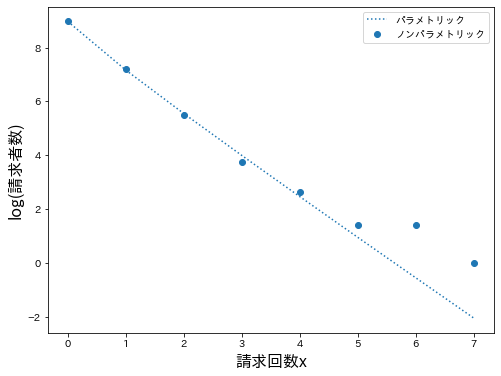

In [ ]:
x=[0,1,2,3,4,5,6,7]
N=9461
y_gam = [N*f(x,nu,sigma) for x in range(8)]
plt.figure(figsize=(8,6))
plt.scatter(x,np.log(y_x),marker='o',label='ノンパラメトリック')
plt.plot(x,np.log(y_gam),linestyle=':', label='パラメトリック')
plt.xlabel('請求回数x',fontsize=16)
plt.ylabel('log(請求者数)',fontsize=16)
plt.legend()

# 6.2

## 表6.2

In [ ]:
butterflies = pd.read_csv("/content/butterfly.txt", delimiter=" ", index_col="x")

In [ ]:
y = butterflies['y']

In [ ]:
y

x
1     118
2      74
3      44
4      24
5      29
6      22
7      20
8      19
9      20
10     15
11     12
12     14
13      6
14     12
15      6
16      9
17      9
18      6
19     10
20     10
21     11
22      5
23      3
24      3
Name: y, dtype: int64

In [ ]:
sum(y)

501

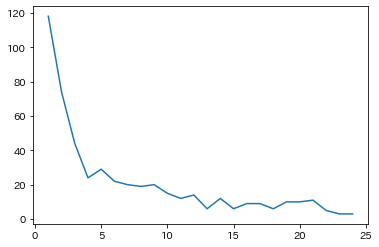

In [ ]:
x=range(1,25)
plt.plot(x,y)

## 表6.3(蝶）

In [ ]:
index_ta = [i/10 for i in range(11)]

In [ ]:
def sd_(t):
  a = 0
  for i in range(1,25):
    a = a + y[i]*t**(2*i)
  return np.sqrt(a)

In [ ]:
sd_hat_list = [sd_(t/10) for t in range(11)]
sd_hat = pd.DataFrame({'sd(t) ' :sd_hat_list},index = index_ta)

In [ ]:
def Enonpara_(t):
  a = 0
  for i in range(1,25):
    a += -((-1)**i)*y[i]*(t**i)
  return a

In [ ]:
Enonpara_list = [Enonpara_(t/10) for t in range(11)]
Enonpara_hat = pd.DataFrame({'E(t)': Enonpara_list},index = index_ta)

In [ ]:
ta = pd.concat([Enonpara_hat,sd_hat],axis = 1)

In [ ]:
ta

,E(t),sd(t)
0.00,0.00,0.00
0.10,11.10,1.09
0.20,20.96,2.20
0.30,29.79,3.35
0.40,37.79,4.58
0.50,45.17,5.91
0.60,52.15,7.40
0.70,58.93,9.14
0.80,65.57,11.32
0.90,71.56,14.56


$\hat{ν}$　と $\hat{σ}$ を求める

ガンマ最尤推定

$\displaystyle f_{\nu,\sigma}(x)=\frac{\Gamma(\nu + x)}{\Gamma(\nu)x!} \gamma^{x} (1-γ)^{\nu}$ , $\gamma = \frac{\sigma}{1+\sigma} $

$ \displaystyle f_{\nu,\sigma}(x)=C_{\nu,\sigma} \frac{\Gamma(\nu + x)}{\Gamma(\nu)x!} \gamma^{x} (1-γ)^{\nu}$ , $\gamma = \frac{\sigma}{1+\sigma}  , x=1,\cdots, 24$ 

$C_{\nu,\sigma}$は正規化定数

尤度関数
$\displaystyle L(\nu,\sigma)=\prod_{x=1}^{24}f_{\nu,\sigma}(x) ^{y_x}$

対数尤度関数$\displaystyle \sum_{x=1}^{24}y_x \log (f_{\nu,\sigma}(x)) $


In [ ]:
def f_2(x,nu,sigma):
  gam = sigma/(1+sigma)
  a = gam**x*special.gamma(nu+x)*(1-gam)**nu
  b = special.gamma(nu)*factorial(x)
  return a/b

In [ ]:
def likelihood_2(params):
  nu = params[0]
  sigma = params[1]
  return -sum([y[k]*np.log(f_2(k,nu,sigma)) for k in range(1,25)])

In [ ]:
results_2 = optimize.minimize(likelihood_2 ,x0=[0.1,90.00],bounds=[[0, np.inf], [0, np.inf]])
results_2

<ipython-input-27-46a05882f1c1>:4: RuntimeWarning: divide by zero encountered in log
  return -sum([y[k]*np.log(f_2(k,nu,sigma)) for k in range(1,25)])
/usr/local/lib/python3.8/dist-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 86142.0682532469
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-56892.16780677,     80.0748173 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 66
      nit: 17
     njev: 22
   status: 0
  success: True
        x: array([ 0.20371655, 42.42661621])

In [ ]:
nu,sigma = results_2.x
print('nu_hat :', nu)
print('sigma_hat :' ,sigma)

nu_hat : 0.2037165456382444
sigma_hat : 42.42661621298089


In [ ]:
def Epara(t):
  nu = 0.104
  sigma = 89.79
  gamma = sigma/(1+ sigma)
  y_1 = y[1]
  return y_1*(1-(1+gamma*t)**(-nu))/(gamma*nu)

In [ ]:
Epara_list = [Epara(t/10) for t in range(11)]

In [ ]:
Epara_hat = pd.DataFrame( {'Epara(t)': Epara_list},index = index_ta)

In [ ]:
Epara_hat

,Epara(t)
0.00,0.00
0.10,11.20
0.20,21.33
0.30,30.59
0.40,39.09
0.50,46.95
0.60,54.26
0.70,61.08
0.80,67.48
0.90,73.50


## 図6.2（蝶）

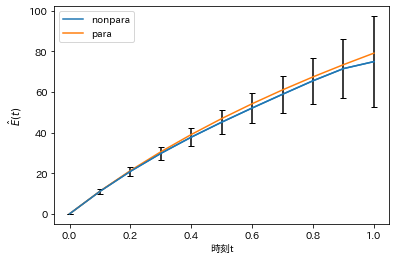

In [ ]:
x=index_ta
e_p = Epara_list
e_np = Enonpara_list
plt.plot(x,e_np,label='nonpara')
plt.plot(x,e_p,label='para')
plt.errorbar(x,e_np,yerr=sd_hat_list, capsize=3, ecolor='black', mfc='None')
plt.xlabel('時刻t')
plt.ylabel('$ \hat{E}(t)$')
plt.legend()

## 表6.4

In [ ]:
shakespeare = pd.read_csv("/content/shakespeare.txt", delimiter=" ", index_col="appeared")

In [ ]:
shakespeare

,count
appeared,
1,14376
2,4343
3,2292
4,1463
5,1043
...,...
96,10
97,15
98,7


## 表6.3(シェイクスピア)


In [ ]:
y=shakespeare['count']

In [ ]:
index_ta = [i/10 for i in range(11)]

In [ ]:
def Enonpara_shake(t):
  a = 0
  for i in range(1,101):
    a += -((-1)**i)*y[i]*(t**i)
  return a

In [ ]:
def sd_shake(t):
  a = 0
  for i in range(1,101):
    a = a + y[i]*t**(2*i)
  return np.sqrt(a)

In [ ]:
Enonpara_shake_list = [Enonpara_shake(t/10) for t in range(11)]
Enonpara_shake_hat = pd.DataFrame({'E(t)': Enonpara_shake_list},index = index_ta)

In [ ]:
def Epara_shake(t):
  nu = -0.39 
  sigma = 104.26
  gamma = sigma/(1+ sigma)
  y_1 = y[1]
  return y_1*(1-(1+gamma*t)**(-nu))/(gamma*nu)

In [ ]:
Epara_shake_list = [Epara_shake(t/10) for t in range(11)]
Epara_shake_hat = pd.DataFrame( {'Epara(t)': Epara_shake_list},index = index_ta)

In [ ]:
sd_shake_hat_list = [sd_shake(t/10) for t in range(11)]
sd_shake_hat = pd.DataFrame({'sd(t) ' :sd_shake_hat_list},index = index_ta)
table_sh = pd.concat([Enonpara_shake_hat,sd_shake_hat],axis = 1)

In [ ]:
table_sh

,E(t),sd(t)
0.00,0.00,0.00
0.10,1396.33,12.01
0.20,2717.76,24.13
0.30,3974.00,36.48
0.40,5172.80,49.21
0.50,6320.38,62.52
0.60,7421.66,76.67
0.70,8480.38,92.14
0.80,9499.18,109.80
0.90,10480.29,131.92


## 図6.2(シェイクスピア)

In [ ]:
table_et = pd.concat([Enonpara_shake_hat,Epara_shake_hat],axis = 1)

In [ ]:
table_et

,E(t),Epara(t)
0.00,0.00,-0.00
0.10,1396.33,1396.34
0.20,2717.76,2717.86
0.30,3974.00,3974.29
0.40,5172.80,5173.47
0.50,6320.38,6321.80
0.60,7421.66,7424.62
0.70,8480.38,8486.39
0.80,9499.18,9510.92
0.90,10480.29,10501.46


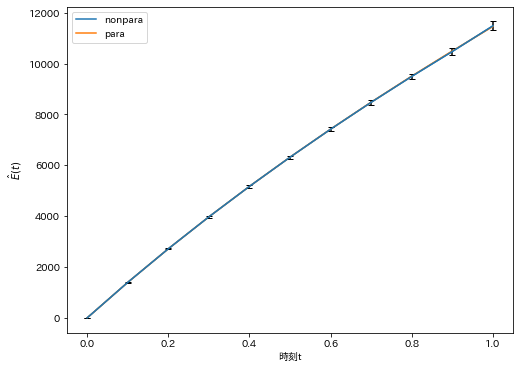

In [ ]:
x=index_ta
e_p = Epara_shake_list
e_np = Enonpara_shake_list
plt.figure(figsize=(8,6))
plt.plot(x,e_np,label='nonpara')
plt.plot(x,e_p,label='para')
plt.errorbar(x,e_np,yerr=sd_shake_hat_list, capsize=3, ecolor='black', mfc='None')
plt.xlabel('時刻t')
plt.ylabel('$ \hat{E}(t)$')
plt.legend()

In [ ]:
#t>1を考えてみる
T = 115
index_tb = [i/100 for i in range(T)]
Enonpara_shake_list_2 = [Enonpara_shake(t/100) for t in range(T)]
Enonpara_shake_hat_2 = pd.DataFrame({'E(t)': Enonpara_shake_list_2},index = index_tb)
Epara_shake_list_2 = [Epara_shake(t/100) for t in range(T)]
Epara_shake_hat_2 = pd.DataFrame( {'Epara(t)': Epara_shake_list_2},index = index_tb)
table_et_2 = pd.concat([Enonpara_shake_hat_2,Epara_shake_hat_2],axis = 1)

In [ ]:
table_et_2

,E(t),Epara(t)
0.00,0.00,-0.00
0.01,143.33,143.33
0.02,285.80,285.80
0.03,427.43,427.43
0.04,568.23,568.24
...,...,...
1.10,37979.10,12391.53
1.11,69618.99,12483.11
1.12,143187.58,12574.42
1.13,315406.36,12665.47


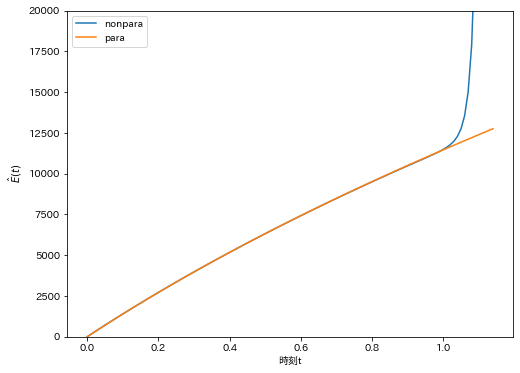

In [ ]:
x=index_tb
e_p = Epara_shake_list_2
e_np = Enonpara_shake_list_2
plt.figure(figsize=(8,6))
plt.plot(x,e_np,label='nonpara')
plt.plot(x,e_p,label='para')
#plt.errorbar(x,e_np,yerr=sd_shake_hat_list, capsize=3, ecolor='black', mfc='None')
plt.ylim(0,20000)
plt.xlabel('時刻t')
plt.ylabel('$ \hat{E}(t)$')
plt.legend()

In [ ]:
sum(y)

30688

In [ ]:
Epara_shake(5)

37404.32070864871

# 6.3

In [4]:
nodes = pd.read_csv("/content/nodes.txt", delimiter=" ")

In [5]:
nodes

,n,x
0,26,0
1,14,14
2,34,3
3,25,2
4,23,5
...,...,...
839,37,28
840,16,11
841,12,0
842,31,12


In [6]:
nodes['n'].value_counts()

17    44
14    43
16    41
20    38
13    36
12    35
18    32
11    29
22    28
21    28
15    26
3     25
7     25
25    24
19    24
10    23
8     23
24    21
6     20
23    17
9     17
5     17
28    17
4     16
29    16
34    14
26    13
32    13
33    12
35    12
27    12
2     11
38    10
40    10
31     8
1      8
36     6
39     6
37     6
30     5
54     4
41     4
42     3
44     3
50     3
49     3
48     2
55     1
47     1
56     1
51     1
43     1
60     1
69     1
63     1
67     1
45     1
61     1
Name: n, dtype: int64

In [7]:
nodes['x'].value_counts()

0     322
1      83
2      73
3      53
4      41
5      38
7      29
9      25
6      20
11     19
8      19
10     12
12     12
13     11
15     11
14     10
16      8
17      7
20      7
19      7
24      5
25      4
23      4
18      4
21      4
29      3
28      2
32      2
26      2
22      1
27      1
34      1
69      1
36      1
31      1
40      1
Name: x, dtype: int64

In [8]:
nodes['p'] = nodes['x']/nodes['n']

## 図6.3

Text(0, 0.5, '度数')

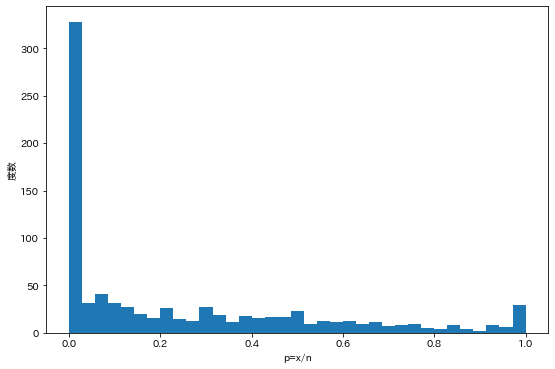

In [9]:
plt.figure(figsize=(9,6))
plt.hist(nodes['p'],bins=35)
plt.xlabel('p=x/n')
plt.ylabel('度数')

(0.0, 100.0)

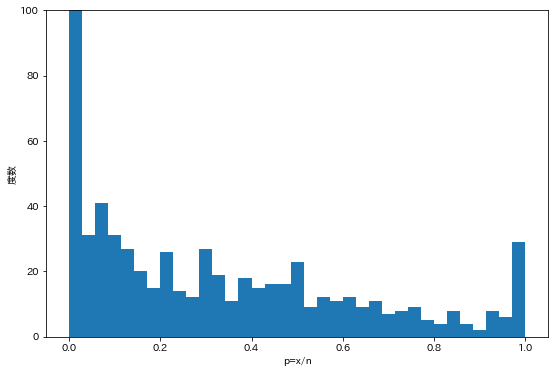

In [30]:
plt.figure(figsize=(9,6))
plt.hist(nodes['p'],bins=35)
plt.xlabel('p=x/n')
plt.ylabel('度数')
plt.ylim(0,100)

## 図6.4

$ \log  g_{\alpha} (\theta) = a_0 + ∑_{j=1}^4 \alpha_j \theta^j   $

ただし、$∫_0^1 g_{\alpha} (\theta)d\theta = 1$を満たす。

$f_{\alpha} (x_k) = ∫_0^1 \binom{n_k}{x_k}\theta^{x_k}(1-\theta)^{n_k-x_k} g_{\alpha} (\theta) d\theta$

$\hat{\alpha} = argmax_{\alpha} \{∑_{k=1}^N \log f_{\alpha} (x_k)  \}   $

In [10]:
def log_g_alpha(alpha, theta):
    a0 = alpha[0]
    return a0 + np.sum([alpha[j] * theta ** j for j in range(1, 5)])

def f_alpha(alpha, xk, nk):
    result, error = quad(lambda theta: binom(nk, xk) * (theta ** xk) * ((1 - theta) ** (nk - xk)) * np.exp(log_g_alpha(alpha, theta)), 0, 1)
    return result

def objective_function(alpha, xk, nk):
    return -np.sum([np.log(f_alpha(alpha, xk[i], nk[i])) for i in range(len(xk))])

def g_alpha_constraint(alpha):
    result, error = quad(lambda theta: np.exp(log_g_alpha(alpha, theta)), 0, 1)
    return result - 1

def optimize_alpha(xk, nk):
    initial_alpha = np.zeros(5)
    result = minimize(fun=objective_function, x0=initial_alpha, args=(xk, nk), constraints=[{"type": "eq", "fun": g_alpha_constraint}], method='SLSQP')
    return result.x

In [17]:
xk = np.array(nodes['x'])
nk = np.array(nodes['n'])

In [18]:
len(xk)

844

In [21]:
alpha_hat = optimize_alpha(xk, nk)

In [20]:
alpha_all = []
for i in range(10):
  x = xk[i*80:(i+1)*80]
  n = nk[i*80:(i+1)*80]
  alpha = optimize_alpha(x, n)
  print('i={}'.format(i),alpha)
  alpha_all.append(alpha)

i=0 [   3.00181401  -43.71946607  189.45640487 -314.54281555  166.75552991]
i=1 [   2.94718377  -40.26269037  156.14496389 -230.63456602  109.79337696]
i=2 [   2.84595401  -42.98169663  183.5913365  -296.01515885  153.86252373]
i=3 [   3.14230466  -40.76029279  140.55477215 -188.29188435   82.50207876]
i=4 [   2.94553896  -44.03877375  167.17075047 -239.43786488  113.62022075]
i=5 [   2.80944619  -44.31664892  193.49185454 -310.09816453  158.4584345 ]
i=6 [   2.64048653  -37.00894461  159.91406004 -261.12069347  135.7629798 ]
i=7 [   2.49271482  -29.64107634   98.35240722 -122.99310533   48.89118506]
i=8 [   2.76652528  -35.8147292   135.290196   -200.02245212   97.49036094]
i=9 [   2.66880727  -34.1549463   124.37527147 -180.78351172   88.56011424]


実行時間4分36秒

In [22]:
theta = np.linspace(0,1,50)
g_all = []
for alpha in alpha_all:
  y = np.array([np.exp(log_g_alpha(alpha,theta[i])) for i in range(len(theta))])
  g_all.append(y)

g_sd = np.std(g_all,axis=0, ddof=1) / np.sqrt(len(theta))

Text(0, 0.5, 'g(θ)')

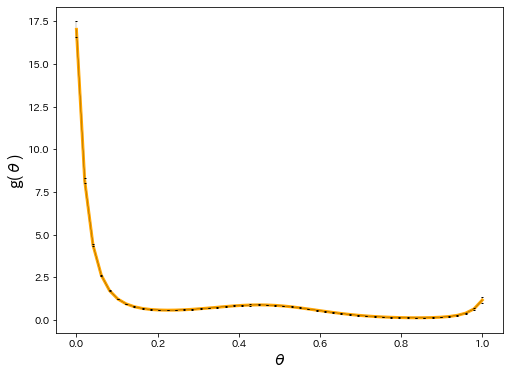

In [23]:
plt.figure(figsize=(8,6))
theta = np.linspace(0,1,50)
y = np.array([np.exp(log_g_alpha(alpha_hat,theta[i])) for i in range(len(theta))])
plt.plot(theta,y,color='orange',linewidth=3)
plt.errorbar(theta, y, yerr = g_sd , capsize=1,color='black',linewidth=0.2)
plt.xlabel('θ',fontsize=16)
plt.ylabel('g(θ)',fontsize=16)

4分40秒

In [24]:
alpha_hat

array([   2.83398156,  -39.03978325,  153.0063604 , -231.08071121,
        114.44024289])

Text(0, 0.5, 'g(θ)')

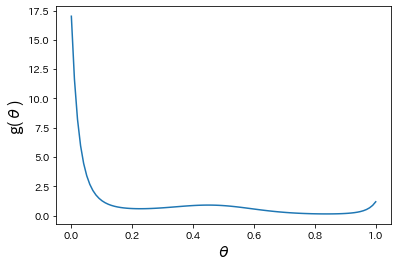

In [63]:
theta = np.linspace(0,1,100)
y = np.array([np.exp(log_g_alpha(alpha_hat,theta[i])) for i in range(len(theta))])
plt.plot(theta,y)
plt.xlabel('θ',fontsize=16)
plt.ylabel('g(θ)',fontsize=16)

In [25]:
alpha_boot=[]
for i in range(10):
  nodes_sample =  nodes.sample(n=nodes.shape[0], replace=True)
  x = np.array(nodes_sample['x'])
  n = np.array(nodes_sample['n'])
  alpha = optimize_alpha(x, n)
  print('i={}'.format(i),alpha)
  alpha_boot.append(alpha)

i=0 [   2.85450003  -38.65428772  147.0280219  -217.60381712  106.59501905]
i=1 [   2.78918961  -38.96129806  156.69554717 -241.05484251  120.7648339 ]
i=2 [   2.81117215  -38.320101    151.84245178 -232.14804761  115.87806684]
i=3 [   2.83275545  -38.73414215  149.85006725 -222.77763555  108.56109029]
i=4 [   2.82101884  -39.40443278  154.38385112 -231.58171622  113.90000823]
i=5 [   2.99977606  -44.82578877  184.40042914 -287.1545869   145.1927595 ]
i=6 [   2.7693177   -38.85709172  150.64507963 -223.0387438   108.66694878]
i=7 [   2.98915765  -45.23373244  186.40245913 -289.34709968  145.80262536]
i=8 [   2.92297525  -42.69063091  171.18627008 -260.20427157  129.06084281]
i=9 [   2.82528985  -40.64993404  164.11835889 -250.95244364  124.82379485]


In [28]:
theta = np.linspace(0,1,50)
g_boot = []
for alpha in alpha_boot:
  y = np.array([np.exp(log_g_alpha(alpha,theta[i])) for i in range(len(theta))])
  g_boot.append(y)

g_boot_sd = np.std(g_boot,axis=0, ddof=1) 

Text(0, 0.5, 'g(θ)')

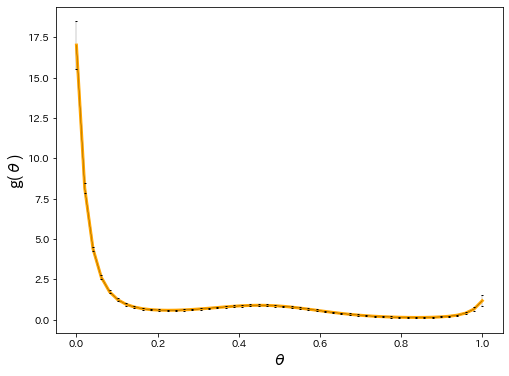

In [29]:
plt.figure(figsize=(8,6))
theta = np.linspace(0,1,50)
y = np.array([np.exp(log_g_alpha(alpha_hat,theta[i])) for i in range(len(theta))])
plt.plot(theta,y,color='orange',linewidth=3)
plt.errorbar(theta, y, yerr = g_boot_sd , capsize=1,color='black',linewidth=0.2)
plt.xlabel('θ',fontsize=16)
plt.ylabel('g(θ)',fontsize=16)

## (6.42)

In [75]:
result, error = quad(lambda theta: np.exp(log_g_alpha(alpha_hat, theta)), 0, 0.01)
print('Pr{θk ≤ 0.01} = ',result)

Pr{θk ≤ 0.01} =  0.14149705091177717


In [71]:
result, error = quad(lambda theta: np.exp(log_g_alpha(alpha_hat, theta)), 0, 0.2)
print('Pr{θk ≤ 0.2} = ',result)

Pr{θk ≤ 0.2} =  0.5866549522988117


In [74]:
result, error = quad(lambda theta: np.exp(log_g_alpha(alpha_hat, theta)), 0.8,1.00)
print('Pr{0.8 ≤ θk ≤ 1} = ',result)

Pr{0.8 ≤ θk ≤ 1} =  0.05849703947824276


## 図6.5

In [64]:
def g_theta(theta,xk,nk,alpha_hat):
  return binom(nk, xk) * (theta ** xk) * ((1 - theta) ** (nk - xk)) * np.exp(log_g_alpha(alpha_hat, theta))/f_alpha(alpha_hat,xk,nk)

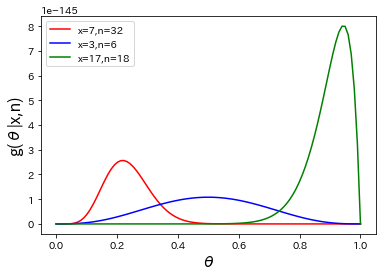

In [68]:
theta = np.linspace(0,1,100)
y1 = g_theta(theta,7,32,alpha_hat)
y2 = g_theta(theta,3,6,alpha_hat)
y3 = g_theta(theta,17,18,alpha_hat)

plt.plot(theta,y1,label='x=7,n=32',color ='red')
plt.plot(theta,y2,label='x=3,n=6',color ='blue')
plt.plot(theta,y3,label='x=17,n=18',color ='green')
plt.xlabel('θ',fontsize=16)
plt.ylabel('g(θ|x,n)',fontsize=16)
plt.legend()